In [9]:
import gymnasium as gym
import pkg_resources
import numpy as np
from factory_env.envs.parameters import env_param
import matplotlib.pyplot as plt
import time
from shapely.geometry import LinearRing, LineString, Point
from shapely.ops import unary_union


options = {'init_type': 'load', 'file_name': 'test.pkl'}
# options = {'init_type': 'run', 'file_name': 'test.pkl'}

params:env_param = env_param()
params.atr_param.atr_linear_vel_max = 0.2
params.path_param.target_finishing_time = 30

print(params.sensor_param.angles_of_sectors.shape)
env = gym.make('training-factory-v0', params=params,)
next_obs, info = env.reset(options=options)

action = env.action_space.sample()
observation, reward, done, truncated, info = env.step(action)

# print(env.path.wall_up)

(20,)
init_state: [ 1.07  -4.172 -2.223]


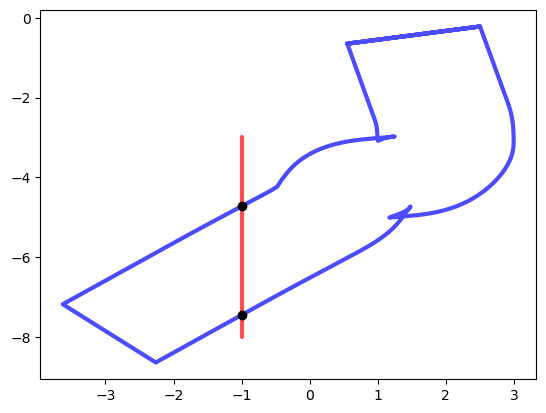

In [30]:
exterior =  np.vstack([env.path.start_line, env.path.wall_up, env.path.end_line[::-1], env.path.wall_down[::-1]])

ring = LinearRing(exterior)
line = LineString([(-1, -8), (-1, -3)])
intersection = ring.intersection(line)


# Plot the original shapes
x, y = ring.xy
plt.plot(x, y, color='blue', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
x, y = line.xy
plt.plot(x, y, color='red', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)

# Plot the intersection(s)
if intersection.geom_type == 'Point':
    plt.plot(*intersection.xy, 'ko')
elif intersection.geom_type == 'MultiPoint':
    for point in intersection.geoms:
        plt.plot(*point.xy, 'ko')
elif intersection.geom_type == 'LineString':
    x, y = intersection.xy
    plt.plot(x, y, 'ko')

plt.show()

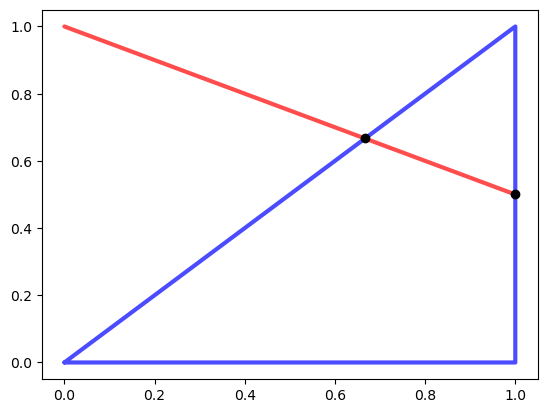

In [8]:
import matplotlib.pyplot as plt
from shapely.geometry import LinearRing, LineString, Point
from shapely.ops import unary_union

# Create a LinearRing and a LineString
ring = LinearRing([(0, 0), (1, 1), (1, 0)])
line = LineString([(0, 1), (1, 0.5)])

# Find the intersection
intersection = ring.intersection(line)

# Plot the original shapes
x, y = ring.xy
plt.plot(x, y, color='blue', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
x, y = line.xy
plt.plot(x, y, color='red', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)

# Plot the intersection(s)
if intersection.geom_type == 'Point':
    plt.plot(*intersection.xy, 'ko')
elif intersection.geom_type == 'MultiPoint':
    for point in intersection.geoms:
        plt.plot(*point.xy, 'ko')
elif intersection.geom_type == 'LineString':
    x, y = intersection.xy
    plt.plot(x, y, 'ko')

plt.show()


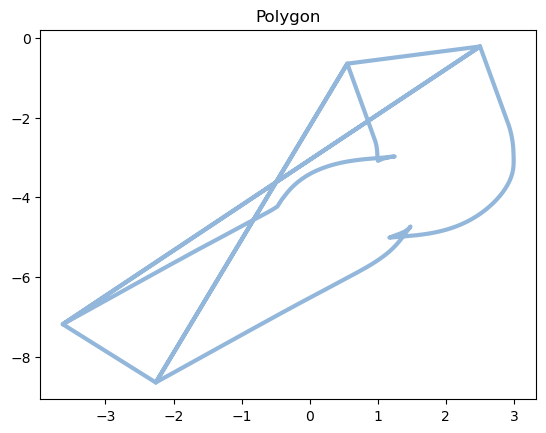

In [17]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

# Create a Polygon
polygon = env.path.bounding_box_polygon

# Get x and y coordinates
x,y = polygon.exterior.xy

# Create a plot
fig, ax = plt.subplots()

# Add the polygon to the plot
ax.plot(x, y, color='#6699cc', alpha=0.7,
    linewidth=3, solid_capstyle='round', zorder=2)

# Set the title
ax.set_title('Polygon')

# Show the plot
plt.show()


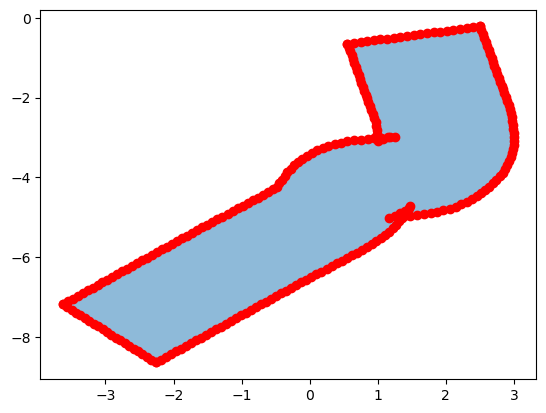

In [26]:
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import numpy as np

# Assuming these are your arrays
wall_up = np.array([[1, 2], [3, 2]])
wall_down = np.array([[1, 0], [3, 0]])
start_line = np.array([[1, 0], [1, 2]])
end_line = np.array([[3, 0], [3, 2]])

# Combine all segments in correct order
# exterior = np.vstack((start_line, wall_up, end_line[::-1], wall_down[::-1]))
exterior =  np.vstack([env.path.start_line, env.path.wall_up, env.path.end_line[::-1], env.path.wall_down[::-1]])

# Create a polygon
polygon = Polygon(exterior)

# Visualize it
x,y = polygon.exterior.xy
plt.plot(x, y, 'blue')
plt.fill(x, y, alpha=0.5)

# Mark the vertices
for point in exterior:
    plt.plot(*point, 'ro')

plt.show()
